Priscilla Philby Oommen

---

PowerCo Customer Churn Prediction

# Feature Engineering and Modelling


1. Import packages
2. Load data
3. Modelling

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## 2. Load data

In [3]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_for_predictions.csv")

In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  float64
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   forecast_price_pow_off_peak                 14606 non-null  float64
 10  has_gas   

In [7]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,0.966726,1.517203,0.137283,0.050491,43.130056,0.181501,...,35.464056,4.910516,0.255032,0.061139,0.462413,0.126181,0.094139,0.293989,0.215528,0.485896
std,0.884515,1.717071,1.769305,0.683592,5.108289,0.571481,0.024623,0.049037,4.485988,0.385446,...,30.248229,3.795906,0.435894,0.239594,0.498602,0.332065,0.292033,0.455602,0.411202,0.499818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,1.235023,0.116340,0.000000,40.606701,0.000000,...,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.149727,0.000000,2.899547,3.046836,0.000000,1.296555,0.143166,0.084138,44.311378,0.000000,...,30.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.610285,0.000000,3.529430,3.380716,0.000000,2.120673,0.146348,0.098837,44.311378,0.000000,...,64.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.792889,6.618528,5.887169,4.918575,30.000000,2.778376,0.273963,0.195975,59.266378,1.000000,...,151.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Check for missing values
# df.isnull().sum()
df.isnull().values.any() # returns True when there is at least one missing value occurring in the data.

False

In [9]:
df.duplicated().sum() # returns the number of duplicated values

0

## Data Visualization

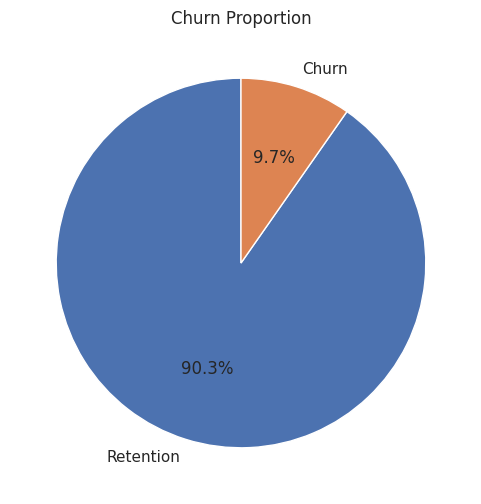

In [10]:
# Churn Proportion (Pie Chart)
# Proportion of Churn vs. Non-Churn
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Retention', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Proportion')
plt.show()


```
# Distribution of Numerical Features (Boxplot)
# Boxplots for numerical features

# Select numerical columns
num_col = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplot to observe outliers
plt.figure(figsize=(25, 25)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
for i, col in enumerate(num_col, start=1):
    plt.subplot(9, 7, i)  # Adjust rows and columns as per the number of features
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust spacing between subplots
plt.show()
```


```
# Distribution of Numerical Features (Histograms)
# Histograms for numerical features

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(25, 25)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(9, 7, i)  # Adjust rows and columns as per the number of features
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
```

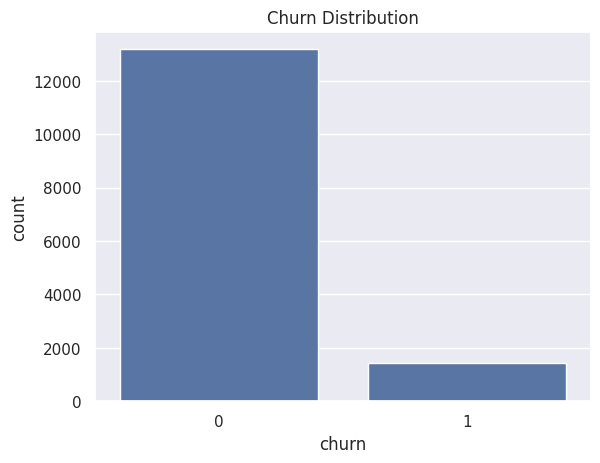

In [11]:
# Distribution of the Target Feature (churn)
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.show()

The churn target feature in the dataset is imbalanced (e.g., significantly more retained customers (0) than churned customers (1)), it can lead to biased models and inaccurate predictions.

## Data Preprocessing

**Skewness**: If the data is skewed to one side, it could mean that there are specific pricing policies or usage behaviors affecting churn in a particular direction.

Skewness is calculated by measuring how much data deviates from symmetry, and its sign (positive or negative) tells you the direction of the skew.

**Skewness and Trends**: Skewed distributions could imply that a small segment of customers are responsible for extremely high charges, influencing the churn behavior.

**Outlier Handling**: Highly skewed data often has outliers, which can unduly influence models, especially those sensitive to extreme values (e.g., linear models). Removing or transforming outliers can help in such cases.

see the statistics of the skewed features

In [12]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,0.966726,1.517203,0.137283,0.050491,43.130056
std,0.884515,1.717071,1.769305,0.683592,5.108289,0.571481,0.024623,0.049037,4.485988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149727,0.000000,2.899547,3.046836,0.000000,1.296555,0.143166,0.084138,44.311378
75%,4.610285,0.000000,3.529430,3.380716,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,30.000000,2.778376,0.273963,0.195975,59.266378


Now we can see that for the majority of the features, their standard deviation is low. This is a good thing, it shows that these features are more stable and predictable now.

## Feature Selection: Correlation Matrix (Heatmap)


```
# Correlation Heatmap
plt.figure(figsize=(40, 40))
# Calculate correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=12)
plt.show()
```

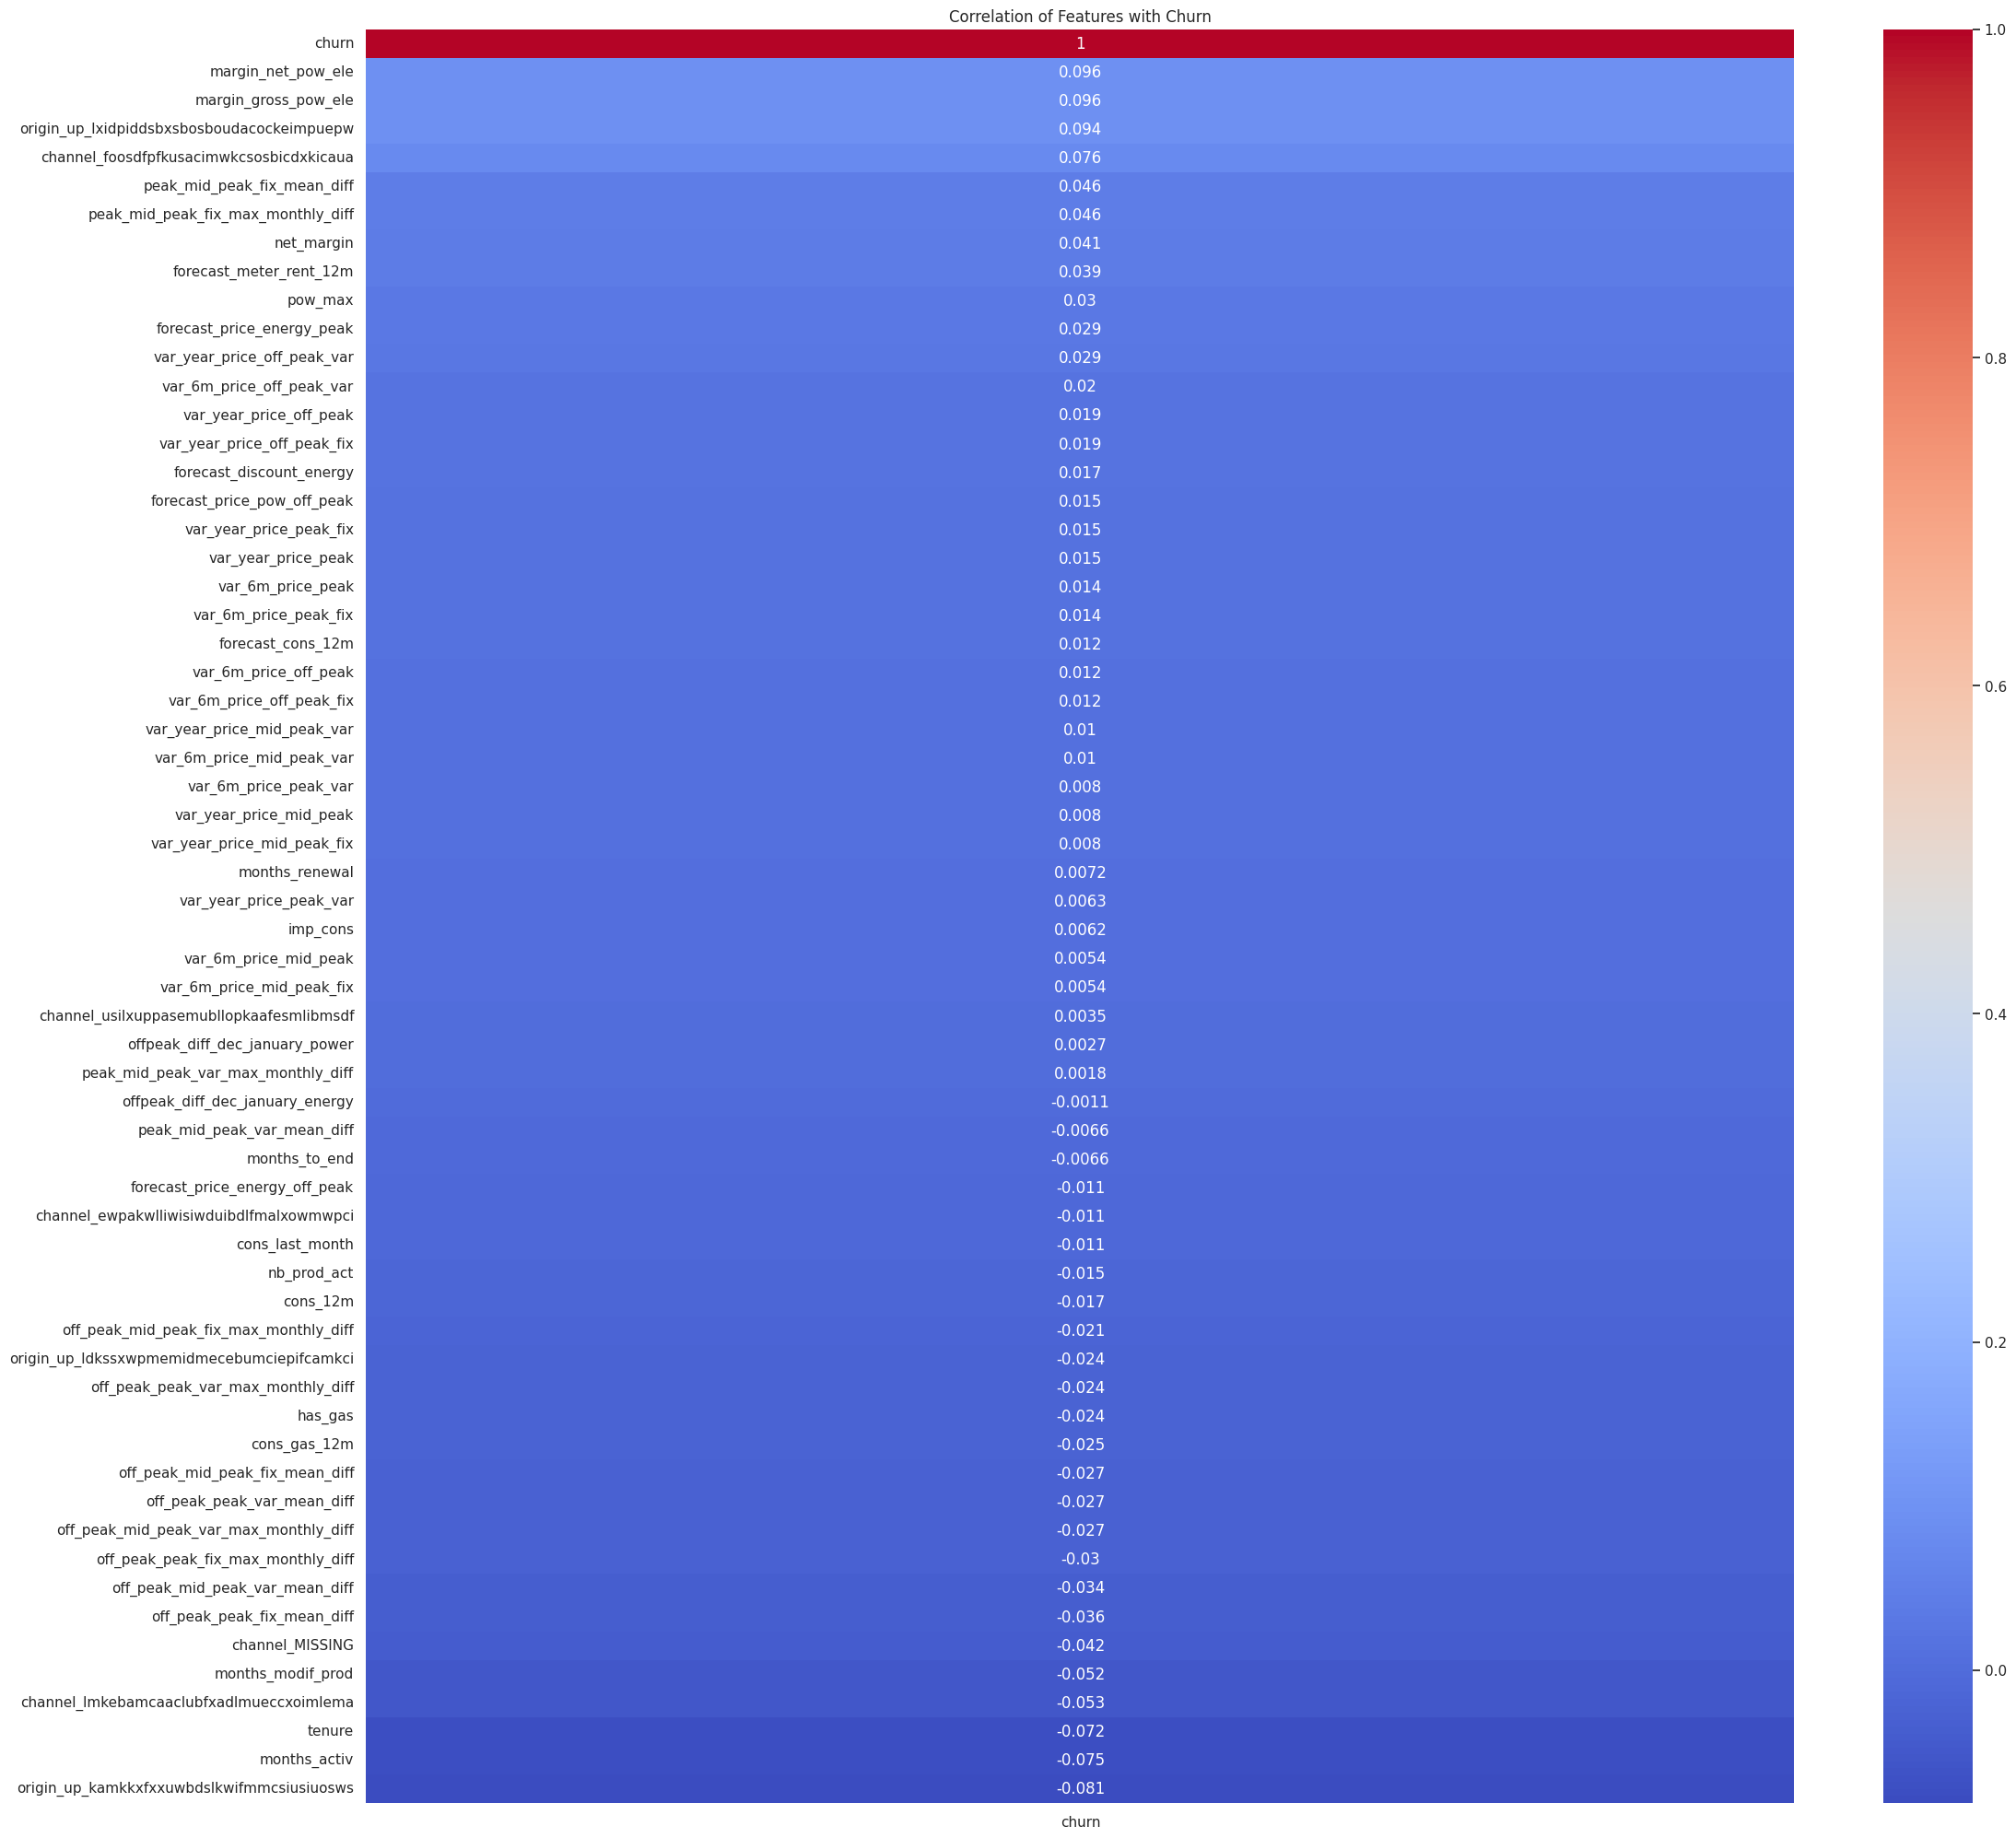

In [13]:
# Correlation of Features with Churn
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix[["churn"]].sort_values(by="churn", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Churn")
plt.show()

## Remove outliers from the dataset

In [14]:
# Feature Scaling: Quantile Transformer

# Using Quantile Transformer to remove outliers and Scale numerical features
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer()
num_cols = df.drop('churn', axis='columns').select_dtypes(include=['float64', 'int64']) # Get numeric columns as dataframe
# calculate median and IQR
quantile.fit(num_cols) # Fit to the numerical data
dfq = quantile.transform(num_cols) # Transform the numerical data
# Store the transformed data back into dataframe
dfchurn = pd.DataFrame(dfq, columns=num_cols.columns)

In [15]:
# Add the extracted column to the second DataFrame
dfchurn = pd.concat([dfchurn, df['churn']], axis=1)

## Split The Data

The data is split into training and testing sets to evaluate the model.

In [16]:
# Split data into features and target
x = dfchurn.drop('churn', axis=1)
y = dfchurn['churn']


```
# Inspect for infinite values
print("Number of infinite values before handling: " + str(np.isinf(x).sum().sum()))

# Replace infinite values with NaN and then fill with 0
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(0, inplace=True)

# Verify that there are no infinite values left
print("Number of infinite values after handling: " + str(np.isinf(x).sum().sum()))
```


### Imbalanced Dataset

Resolving Class Imbalance in Target Variable "**Churn**" Using Synthetic Minority Oversampling Technique (SMOTE)

In [17]:
!pip install imblearn

In [18]:
# Handle Class Imbalance

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y)

print('Before OverSampling, the shape of x: {}'.format(x.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))

print("Before OverSampling, counts of label '1' in y: {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0' in y: {} \n".format(sum(y == 0)))

print('After OverSampling, the shape of x: {}'.format(x_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1' in y: {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0' in y: {}".format(sum(y_res == 0)))

Before OverSampling, the shape of x: (14606, 61)
Before OverSampling, the shape of y: (14606,) 

Before OverSampling, counts of label '1' in y: 1419
Before OverSampling, counts of label '0' in y: 13187 

After OverSampling, the shape of x: (26374, 61)
After OverSampling, the shape of y: (26374,) 

After OverSampling, counts of label '1' in y: 13187
After OverSampling, counts of label '0' in y: 13187


SMOTE over-sampling:
churn
1    13187
0    13187
Name: count, dtype: int64


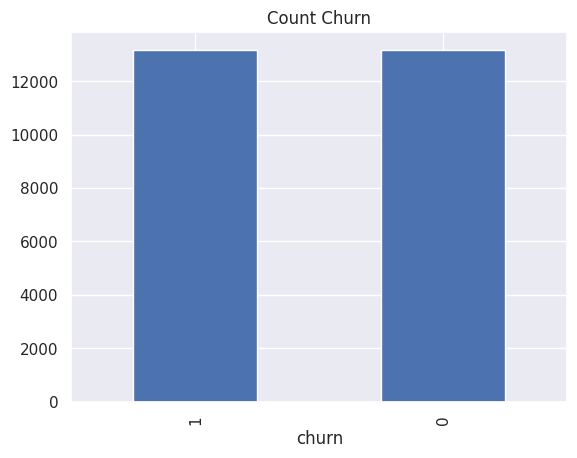

In [19]:
df_smote_over = pd.DataFrame(y_res, columns=['churn'])

print('SMOTE over-sampling:')
print(df_smote_over.churn.value_counts())

df_smote_over.churn.value_counts().plot(kind='bar', title='Count Churn');

## 3. Modelling

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [21]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

**We are using a `Random Forest` classifier.** A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

**Some additional advantages of the random forest classifier include**:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

**On the flip side, some disadvantages of the random forest classifier include**:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of the ensemble.

In [22]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.901697699890471


## Prediction

The new data should be in the same format as the training data, including having the same feature columns (excluding the target variable churn) and being preprocessed the same way.



```
print("Expected feature names:", rf.feature_names_in_)
```



In [23]:
# Example new data (assuming one row of data)

# Converting Dictionary into dataframe
new_data = pd.DataFrame({
      'cons_12m': [0], 'cons_gas_12m': [4.739943986], 'cons_last_month': [0], 'forecast_cons_12m': [0],
  'forecast_discount_energy': [0], 'forecast_meter_rent_12m': [0.4440447959],
  'forecast_price_energy_off_peak': [0.114481], 'forecast_price_energy_peak': [0.098142],
  'forecast_price_pow_off_peak': [40.606701], 'has_gas': [1], 'imp_cons': [0], 'margin_gross_pow_ele': [25.44],
  'margin_net_pow_ele': [25.44], 'nb_prod_act': [2], 'net_margin': [678.99], 'pow_max': [43.648],
  'var_year_price_off_peak_var': [6.13E-05], 'var_year_price_peak_var': [2.63E-05],
  'var_year_price_mid_peak_var': [0.0004402762588], 'var_year_price_off_peak_fix': [1.102784696],
  'var_year_price_peak_fix': [49.55070279], 'var_year_price_mid_peak_fix': [22.02253505],
  'var_year_price_off_peak': [1.102845989], 'var_year_price_peak': [49.55072906], 'var_year_price_mid_peak': [22.02297533],
  'var_6m_price_off_peak_var': [0.0001314535266], 'var_6m_price_peak_var': [4.10E-05],
  'var_6m_price_mid_peak_var': [0.0009084736946], 'var_6m_price_off_peak_fix': [2.08629369],
  'var_6m_price_peak_fix': [99.53051658], 'var_6m_price_mid_peak_fix': [44.23579384],
  'var_6m_price_off_peak': [2.086425143], 'var_6m_price_peak': [99.53055759], 'var_6m_price_mid_peak': [44.23670231],
  'offpeak_diff_dec_january_energy': [0.020057], 'offpeak_diff_dec_january_power': [3.70096056],
  'off_peak_peak_var_mean_diff': [0.02403775], 'peak_mid_peak_var_mean_diff': [0.03421891667],
  'off_peak_mid_peak_var_mean_diff': [0.05825666667], 'off_peak_peak_fix_mean_diff': [18.59025517],
  'peak_mid_peak_fix_mean_diff': [7.45066997], 'off_peak_mid_peak_fix_mean_diff': [26.04092514],
  'off_peak_peak_var_max_monthly_diff': [0.06055], 'peak_mid_peak_var_max_monthly_diff': [0.085483],
  'off_peak_mid_peak_var_max_monthly_diff': [0.146033],
  'off_peak_peak_fix_max_monthly_diff': [44.26692996], 'peak_mid_peak_fix_max_monthly_diff': [8.14577508],
  'off_peak_mid_peak_fix_max_monthly_diff': [44.26692996], 'tenure': [3], 'months_activ': [30],
  'months_to_end': [5], 'months_modif_prod': [2], 'months_renewal': [6], 'channel_MISSING': [0],
  'channel_ewpakwlliwisiwduibdlfmalxowmwpci': [0],
  'channel_foosdfpfkusacimwkcsosbicdxkicaua': [1],
  'channel_lmkebamcaaclubfxadlmueccxoimlema': [0],
  'channel_usilxuppasemubllopkaafesmlibmsdf': [0],
  'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws': [0],
  'origin_up_ldkssxwpmemidmecebumciepifcamkci': [0],
  'origin_up_lxidpiddsbxsbosboudacockeimpuepw': [1]
})

In [24]:
# Make a predictions on new data
prediction = rf.predict(new_data)

# Interpret the result
print("Customer Churn Prediction:", prediction)
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

Customer Churn Prediction: [1]
The customer is likely to churn.


**Meaning of Probability of Churning**

The probability of churning refers to the likelihood or chance that a customer will leave or discontinue using a service or product within a certain period. It is a measure of how likely a customer is to "churn," or in other words, cancel their subscription, stop using a service, or switch to a competitor.

Probability of Churning quantifies this likelihood, often expressed as a value between 0 and 1, where:
- A probability closer to 0 means that the customer is very unlikely to churn.
- A probability closer to 1 means that the customer is highly likely to churn.

**How is Probability of Churning Calculated?**

In a predictive model, such as a machine learning model, the probability of churning is calculated based on various factors or features about the customer. These features could include:
- Usage patterns (e.g., how often the customer uses the service, total charges, or service plan types).
- Customer behavior (e.g., complaints, customer service calls, or feedback).
- Demographic information (e.g., age, location, or subscription length).
- Engagement metrics (e.g., how actively the customer interacts with the service or product).

For example, a machine learning model might output a churn probability for each customer, where:
- A churn probability of 0.8 means there's an 80% chance the customer will churn.
- A churn probability of 0.2 means there's a 20% chance the customer will churn.

**Interpretation of Probability of Churning**

- **Low Probability of Churning** (e.g., 0 - 0.3): The customer is unlikely to churn. These customers are generally considered more satisfied or loyal, but may still benefit from continued engagement efforts.
- **Moderate Probability of Churning** (e.g., 0.3 - 0.7): These customers are somewhat at risk, and businesses might focus on improving their experience to prevent churn.
- **High Probability of Churning** (e.g., 0.7 - 1): The customer is at high risk of leaving. This can be used to identify customers who need targeted retention efforts, such as special offers, loyalty programs, or customer support interventions.

In [25]:
churn_prob = rf.predict_proba(new_data)   # churn probability, not churn rate
"""The predict_proba method is used to predict the probability of each class label, and it
returns the probability estimates for each possible class label. This method is often used
for binary or multi-class classification problems, where you want to know the probability of each possible outcome."""

# Access the probability of churn (class 1) from the array
churn_probability = churn_prob[0][1]  # Get the probability for class 1
print(f"Estimated likelihood of customer churn: {churn_probability:.2%}")  # Format the probability
if churn_probability >= 0.7:
    print(f"..High Probability of Churning..")
elif churn_probability <= 0.3:
    print(f"..Low Probability of Churning..")
else:
    print(f"..Moderate Probability of Churning..")

Estimated likelihood of customer churn: 57.20%
..Moderate Probability of Churning..


In [26]:
# Example new data (assuming one row of data)

# Converting Dictionary into dataframe
new_data2 = pd.DataFrame({
      'cons_12m': [2.511883361], 'cons_gas_12m': [0], 'cons_last_month': [0], 'forecast_cons_12m': [0.9694159124],
  'forecast_discount_energy': [0], 'forecast_meter_rent_12m': [0.318063335],
  'forecast_price_energy_off_peak': [0.14317], 'forecast_price_energy_peak': [0],
  'forecast_price_pow_off_peak': [44.31137796], 'has_gas': [0], 'imp_cons': [0], 'margin_gross_pow_ele': [18.62],
  'margin_net_pow_ele': [18.62], 'nb_prod_act': [2], 'net_margin': [1.27], 'pow_max': [13.2],
  'var_year_price_off_peak_var': [5.08E-06], 'var_year_price_peak_var': [0],
  'var_year_price_mid_peak_var': [0], 'var_year_price_off_peak_fix': [0.008380225964],
  'var_year_price_peak_fix': [0], 'var_year_price_mid_peak_fix': [0],
  'var_year_price_off_peak': [0.008385305698], 'var_year_price_peak': [0], 'var_year_price_mid_peak': [0],
  'var_6m_price_off_peak_var': [1.95E-06], 'var_6m_price_peak_var': [0],
  'var_6m_price_mid_peak_var': [0], 'var_6m_price_off_peak_fix': [0.0052676214],
  'var_6m_price_peak_fix': [0], 'var_6m_price_mid_peak_fix': [0],
  'var_6m_price_off_peak': [0.00526957194], 'var_6m_price_peak': [0], 'var_6m_price_mid_peak': [0],
  'offpeak_diff_dec_january_energy': [-0.005164], 'offpeak_diff_dec_january_power': [0.1777788],
  'off_peak_peak_var_mean_diff': [0.1474783333], 'peak_mid_peak_var_mean_diff': [0],
  'off_peak_mid_peak_var_mean_diff': [0.1474783333], 'off_peak_peak_fix_mean_diff': [44.34100546],
  'peak_mid_peak_fix_mean_diff': [0], 'off_peak_mid_peak_fix_mean_diff': [44.34100546],
  'off_peak_peak_var_max_monthly_diff': [0.150211], 'peak_mid_peak_var_max_monthly_diff': [0],
  'off_peak_mid_peak_var_max_monthly_diff': [0.150211],
  'off_peak_peak_fix_max_monthly_diff': [44.44470996], 'peak_mid_peak_fix_max_monthly_diff': [0],
  'off_peak_mid_peak_fix_max_monthly_diff': [44.44470996], 'tenure': [7], 'months_activ': [77],
  'months_to_end': [6], 'months_modif_prod': [7], 'months_renewal': [5], 'channel_MISSING': [0],
  'channel_ewpakwlliwisiwduibdlfmalxowmwpci': [0],
  'channel_foosdfpfkusacimwkcsosbicdxkicaua': [1],
  'channel_lmkebamcaaclubfxadlmueccxoimlema': [0],
  'channel_usilxuppasemubllopkaafesmlibmsdf': [0],
  'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws': [0],
  'origin_up_ldkssxwpmemidmecebumciepifcamkci': [1],
  'origin_up_lxidpiddsbxsbosboudacockeimpuepw': [0]
})

In [27]:
# Make a predictions on new data
prediction = rf.predict(new_data2)

# Interpret the result
print("Customer Churn Prediction:", prediction)
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

Customer Churn Prediction: [0]
The customer is not likely to churn.


In [28]:
churn_prob = rf.predict_proba(new_data2)   # churn probability, not churn rate
"""The predict_proba method is used to predict the probability of each class label, and it
returns the probability estimates for each possible class label. This method is often used
for binary or multi-class classification problems, where you want to know the probability of each possible outcome."""

# Access the probability of churn (class 1) from the array
churn_probability = churn_prob[0][1]  # Get the probability for class 1
print(f"Estimated likelihood of customer churn: {churn_probability:.2%}")  # Format the probability
if churn_probability >= 0.7:
    print(f"..High Probability of Churning..")
elif churn_probability <= 0.3:
    print(f"..Low Probability of Churning..")
else:
    print(f"..Moderate Probability of Churning..")

Estimated likelihood of customer churn: 40.27%
..Moderate Probability of Churning..


## Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

The performance of the predictive model is evaluated on the basis of performance matrix like accuracy, precision, recall, f1-score, area under ROC curve, and confusion matrix.

**Accuracy** is the ratio of correctly predicted observations to the total observations. A high accuracy score (e.g., above 90%) would generally suggest a good model.

**Precision** expresses the ratio of correctly detected Positive classes to all positives. High precision means the model is good at correctly identifying customers who will churn (fewer false positives). This is crucial if the cost of misclassifying a retained customer as a churner is high (e.g., unnecessary retention efforts).

**Recall** expresses the ratio of correctly detected Positive classes to true positives. High recall means the model is good at capturing most of the actual churners (fewer false negatives). This is important if the cost of missing a churner is high (e.g., lost revenue).

**F1-score** is the harmonic mean of recall and precision. A higher F1-score indicates a better overall performance, especially in imbalanced datasets.

**Area under the ROC Curve (AUC)** value measures the accuracy of a diagnostic test. It is calculated according to the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve is a visual representation of model performance across all thresholds. A higher AUC value (closer to 1) indicates better model performance in distinguishing between churners and non-churners.

**Confusion Matrix** is used to measure the performance of the classification model. It has four different outcomes: TP, TN, FP, FN. This visualization helps to understand the distribution of true positives, true negatives, false positives, and false negatives. It gives a more detailed view of the model's predictions.

These metrics are chosen because they provide a comprehensive view of the model's performance, especially in cases where the classes are imbalanced (like in this churn prediction scenario where there might be more retained customers than churned customers). Accuracy alone can be misleading in such cases. It is a crucial step in assessing the effectiveness of the trained Random Forest model for customer churn prediction. By comparing predictions to actual values and calculating key metrics, it helps data scientists understand how well the model is likely to perform in real-world scenarios.

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       1.00      0.02      0.04       366

    accuracy                           0.90      3652
   macro avg       0.95      0.51      0.49      3652
weighted avg       0.91      0.90      0.86      3652



**Support**: This is the number of actual instances in each class (churn or no churn) in the test dataset.

In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy as percentage
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Accuracy Score: 90.17%


In [31]:
y_pred_proba_rf = rf.predict_proba(x_test)[:, 1]
[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred_proba_rf)
# fpr - false positive rate, tpr - true positive rate, thr - threshold
print('Train/Test split results:\n')
print(rf.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr2, tpr2))

Train/Test split results:

RandomForestClassifier basic accuracy is 0.902
RandomForestClassifier log_loss is 0.305
RandomForestClassifier auc is 0.666


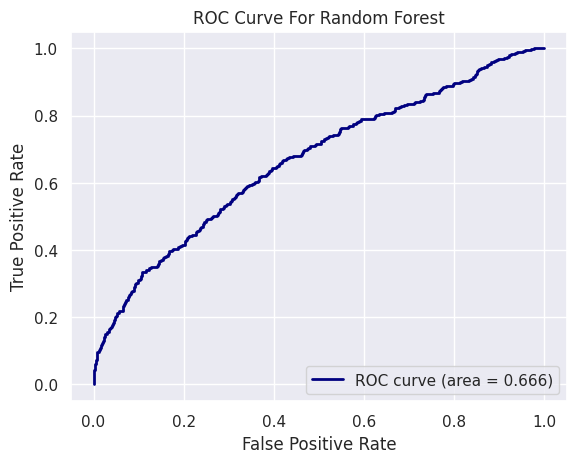

In [32]:
# Plot ROC curve For Random Forest
plt.figure()
plt.plot(fpr2, tpr2, color='navy', lw=2, label='ROC curve (area = %2.3f)' % auc(fpr2, tpr2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Random Forest')
plt.legend(loc="lower right")
plt.show()

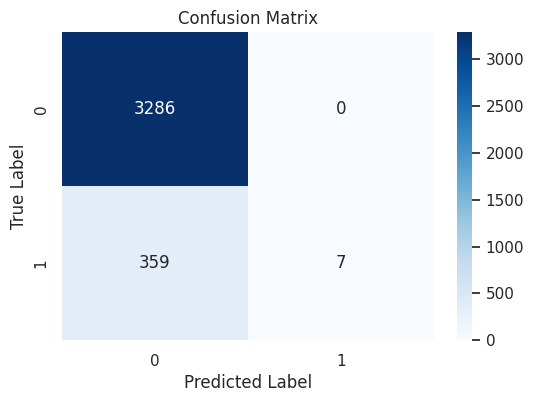

In [33]:
# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

If the model has high accuracy, precision, recall, F1-score, and AUC, along with a confusion matrix that shows a low number of misclassifications, then the performance can be considered satisfactory. This would suggest that the model is effectively identifying churners and non-churners.

However, if any of these metrics are low or the confusion matrix reveals significant misclassifications (especially false negatives if minimizing churn is critical), then further model improvement would be necessary before deeming it satisfactory.